# 로지스틱 SMOTE / Adasyn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [3]:
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

In [4]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv(file_path + 'creditcard_data.csv')

# Amount 변수 제거
data=data.drop('Amount',axis=1)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-0.000001,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,0.770926,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-0.211722,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-0.062481,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,0.133034,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,39.420904,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,1.000000


In [6]:
# 중복된 행 제거
data_cleaned = data.drop_duplicates()

data_cleaned['Class'].value_counts()

0    283252
1       473
Name: Class, dtype: int64

In [7]:
Normal = data[data['Class'] == 0]

# Smote 생성

In [8]:
#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 특징과 클래스 분리
X_sm = data_cleaned.drop('Class', axis=1)
y_sm = data_cleaned['Class']

# 데이터 업샘플링 수행
X_resampled, y_resampled = smote.fit_resample(X_sm, y_sm)

# 업샘플링된 데이터의 클래스 분포 확인
resampled_class_distribution = pd.Series(y_resampled).value_counts()

resampled_class_distribution

0    283252
1    283252
Name: Class, dtype: int64

In [9]:
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_resampled.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [10]:
balanced_data.shape

(566504, 30)

In [11]:
Fraud = balanced_data[balanced_data['Class']==1]
Fraud.shape

(283252, 30)

In [12]:
merged_data = pd.concat([Fraud, Normal], ignore_index=True)
merged_data.shape

(567566, 30)

In [13]:
# Smote 사용

data_cleaned_YD = merged_data.copy()
data_cleaned_JG = merged_data.copy()
data_cleaned_time = merged_data.copy()

In [14]:
# Adasyn 사용

data_adasyn_YD = merged_data.copy()
data_adasyn_JG = merged_data.copy()
data_adasyn_time = merged_data.copy()

In [15]:
data_cleaned_YD.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,...,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000
mean,87685.717012,-2.243530,1.720735,-3.399158,2.259362,-1.493966,-0.729225,-2.599767,0.535799,-1.274264,...,0.203073,0.242102,0.041550,-0.059203,-0.053022,0.020542,0.026075,0.117620,0.044069,0.499064
std,48542.553452,5.109805,3.379234,5.808994,3.089976,3.930131,1.599494,5.207032,3.705025,2.149122,...,0.967641,1.698239,0.880488,1.024726,0.538956,0.622450,0.441173,0.835135,0.406035,0.500000
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,45277.012174,-2.856560,-0.123689,-4.979384,-0.061102,-1.719448,-1.525306,-2.979602,-0.186722,-2.247416,...,-0.183969,-0.157873,-0.484321,-0.225508,-0.376910,-0.303705,-0.270464,-0.062552,-0.054654,0.000000
50%,79325.000000,-0.795765,0.969581,-1.501408,1.438266,-0.432982,-0.680748,-0.701315,0.173197,-0.806992,...,0.043656,0.156631,0.028288,-0.028106,-0.007177,0.040535,-0.002753,0.062364,0.038148,0.000000
75%,134941.000000,0.812365,2.721822,0.277747,4.240666,0.428108,0.020747,0.207159,0.840121,0.091404,...,0.445053,0.621162,0.529981,0.182063,0.335911,0.368337,0.307568,0.431580,0.213015,1.000000
max,172788.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000



## 예닮 Method - Smote

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import matplotlib.pyplot as plt

#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_cleaned_YD[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_cleaned_YD[col].min() <= 0:
            data_cleaned_YD[col] += abs(data_cleaned_YD[col].min()) + 0.1

for col in pro_skew:
    data_cleaned_YD[col + '_log_transformed'] = np.log(data_cleaned_YD[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
  data_cleaned_YD[col + '_squared_transformed'] = data_cleaned_YD[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_cleaned_YD[col + '_minmax_transformed'] = scaler.fit_transform(data_cleaned_YD[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# data_cleaned_YD.head()
# 적용 다한 column은 drop
data_cleaned_YD.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

# data_cleaned_YD.head()

## 진기 Method - Smote

In [17]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def boxcox_transform(data, columns, lambda_value):
    if lambda_value == 0:
        return np.log(data[columns])
    else:
        return (data[columns] ** lambda_value - 1) / lambda_value

data_SMOTE_case2 = data_cleaned_JG.copy()

X_case2 = data_SMOTE_case2.drop('Class',axis=1)
Y_case2 = data_SMOTE_case2['Class']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']

for col in left_skewed_cols:
    # 음의 왜도를 가진 열의 최소값이 0보다 작거나 같은 경우 양수로 변환
    if X_case2[col].min() <= 0:
        X_case2[col] += abs(X_case2[col].min()) + 1

# train_scaler
smtrain_left_skewed = boxcox_transform(X_case2, left_skewed_cols, 0.01)
smtrain_right_skewed = quantileTransform(X_case2, right_skewed_cols)

train_transformed_sm = pd.concat([X_case2, smtrain_left_skewed.add_suffix('_box_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import StandardScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
standardScaler = StandardScaler()

for col in s_columns:
    train_transformed_sm[col + '_standard_Transform'] = standardScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_SMOTE_case2=train_transformed_sm
print(data_SMOTE_case2.head())


X_case2_train, X_case2_test, Y_case2_train, Y_case2_test = train_test_split(data_SMOTE_case2, Y_case2, test_size=0.3, random_state=25)

     Time  V3_box_Transform  V5_box_Transform  V7_box_Transform  \
0   406.0          3.940934          4.852180          3.808890   
1   472.0          3.998127          4.869317          3.877335   
2  4462.0          3.967819          4.849428          3.882800   
3  6986.0          3.919300          4.846603          3.784931   
4  7519.0          3.880529          4.889575          3.908975   

   V9_box_Transform  V10_box_Transform  V12_box_Transform  V14_box_Transform  \
0          2.486926           3.176881           2.860565           2.806557   
1          2.686083           3.260850           2.997958           2.961995   
2          2.688451           3.231793           2.607836           2.974259   
3          2.687762           3.080814           2.195186           2.632530   
4          2.609993           3.191466           2.750113           2.684042   

   V15_box_Transform  V16_box_Transform  ...  V21_qt_Transform  \
0           1.788841           2.673390  ...      

In [51]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import pandas as pd
import numpy as np

def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (data_cleaned_JG[left_skewed_cols].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in left_skewed_cols:
        if data_cleaned_JG[col].min() <= 0:
            data_cleaned_JG[col] += abs(data_cleaned_JG[col].min()) + 0.1

# train_scaler
train_left_skewed = logTransform(data_cleaned_JG, left_skewed_cols)
train_right_skewed = quantileTransform(data_cleaned_JG, right_skewed_cols)

data_cleaned_JG = pd.concat([data_cleaned_JG, train_left_skewed.add_suffix('_log_Transform'), train_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
minmaxScaler = MinMaxScaler()

for col in s_columns:
    data_cleaned_JG[col + '_MM_Transform'] = minmaxScaler.fit_transform(data_cleaned_JG[[col]])

data_cleaned_JG.drop(columns = left_skewed_cols+right_skewed_cols+s_columns, inplace = True)

## Time Method - Smote

In [18]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
data_cleaned_time['Time' + '_standard_Transform'] = standardScaler.fit_transform(data_cleaned_time[['Time']])

In [19]:
data_cleaned_time.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_standard_Transform
count,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,...,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,567566.000000,5.675660e+05
mean,87685.717012,-2.243530,1.720735,-3.399158,2.259362,-1.493966,-0.729225,-2.599767,0.535799,-1.274264,...,0.242102,0.041550,-0.059203,-0.053022,0.020542,0.026075,0.117620,0.044069,0.499064,-3.966057e-16
std,48542.553452,5.109805,3.379234,5.808994,3.089976,3.930131,1.599494,5.207032,3.705025,2.149122,...,1.698239,0.880488,1.024726,0.538956,0.622450,0.441173,0.835135,0.406035,0.500000,1.000001e+00
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,-1.806370e+00
25%,45277.012174,-2.856560,-0.123689,-4.979384,-0.061102,-1.719448,-1.525306,-2.979602,-0.186722,-2.247416,...,-0.157873,-0.484321,-0.225508,-0.376910,-0.303705,-0.270464,-0.062552,-0.054654,0.000000,-8.736405e-01
50%,79325.000000,-0.795765,0.969581,-1.501408,1.438266,-0.432982,-0.680748,-0.701315,0.173197,-0.806992,...,0.156631,0.028288,-0.028106,-0.007177,0.040535,-0.002753,0.062364,0.038148,0.000000,-1.722350e-01
75%,134941.000000,0.812365,2.721822,0.277747,4.240666,0.428108,0.020747,0.207159,0.840121,0.091404,...,0.621162,0.529981,0.182063,0.335911,0.368337,0.307568,0.431580,0.213015,1.000000,9.734825e-01
max,172788.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,1.753150e+00


# Adasyn 생성

In [20]:
#pip install imbalanced-learn
from imblearn.over_sampling import ADASYN

# ADASYN 객체 생성
adasyn = ADASYN(random_state=42)

# 특징과 클래스 분리
X_adasyn = data_cleaned.drop('Class', axis=1)
y_adasyn = data_cleaned['Class']

# 데이터 업샘플링 수행
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_adasyn, y_adasyn)

# 업샘플링된 데이터의 클래스 분포 확인
resampled_class_distribution_adasyn = pd.Series(y_resampled_adasyn).value_counts()

# ADASYN 결과
resampled_class_distribution_adasyn

0    283252
1    283210
Name: Class, dtype: int64

## 예닮 Adasyn

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import matplotlib.pyplot as plt

#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_adasyn_YD[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_adasyn_YD[col].min() <= 0:
            data_adasyn_YD[col] += abs(data_adasyn_YD[col].min()) + 0.1

for col in pro_skew:
    data_adasyn_YD[col + '_log_transformed'] = np.log(data_adasyn_YD[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
  data_adasyn_YD[col + '_squared_transformed'] = data_adasyn_YD[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_adasyn_YD[col + '_minmax_transformed'] = scaler.fit_transform(data_adasyn_YD[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop
data_adasyn_YD.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

# data_adasyn_YD.head()

## 진기 Adasyn

In [22]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def boxcox_transform(data, columns, lambda_value):
    if lambda_value == 0:
        return np.log(data[columns])
    else:
        return (data[columns] ** lambda_value - 1) / lambda_value

data_ADASYN_case5 = data_adasyn_JG.copy()

X_case5 = data_ADASYN_case5.drop('Class',axis=1)
Y_case5 = data_ADASYN_case5['Class']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']

for col in left_skewed_cols:
    # 음의 왜도를 가진 열의 최소값이 0보다 작거나 같은 경우 양수로 변환
    if X_case5[col].min() <= 0:
        X_case5[col] += abs(X_case5[col].min()) + 1

# train_scaler
smtrain_left_skewed = boxcox_transform(X_case5, left_skewed_cols, 0.01)
smtrain_right_skewed = quantileTransform(X_case5, right_skewed_cols)

train_transformed_sm = pd.concat([X_case5, smtrain_left_skewed.add_suffix('_box_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import StandardScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
standardScaler = StandardScaler()

for col in s_columns:
    train_transformed_sm[col + '_standard_Transform'] = standardScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_ADASYN_case5=train_transformed_sm
print(data_ADASYN_case5.head())


X_case5_train, X_case5_test, Y_case5_train, Y_case5_test = train_test_split(data_ADASYN_case5, Y_case2, test_size=0.3, random_state=25)

     Time  V3_box_Transform  V5_box_Transform  V7_box_Transform  \
0   406.0          3.940934          4.852180          3.808890   
1   472.0          3.998127          4.869317          3.877335   
2  4462.0          3.967819          4.849428          3.882800   
3  6986.0          3.919300          4.846603          3.784931   
4  7519.0          3.880529          4.889575          3.908975   

   V9_box_Transform  V10_box_Transform  V12_box_Transform  V14_box_Transform  \
0          2.486926           3.176881           2.860565           2.806557   
1          2.686083           3.260850           2.997958           2.961995   
2          2.688451           3.231793           2.607836           2.974259   
3          2.687762           3.080814           2.195186           2.632530   
4          2.609993           3.191466           2.750113           2.684042   

   V15_box_Transform  V16_box_Transform  ...  V21_qt_Transform  \
0           1.788841           2.673390  ...      

## Time Adasyn

In [23]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
data_adasyn_time['Time' + '_standard_Transform'] = standardScaler.fit_transform(data_adasyn_time[['Time']])

# Model

## YD_model_Smote

In [24]:
X_yd = data_cleaned_YD.drop(columns=['Class'])
y_yd = data_cleaned_YD['Class']
X_train_yd, X_test_yd, y_train_yd, y_test_yd = train_test_split(X_yd, y_yd, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train = model_lr.fit(X_train_yd, y_train_yd)
# X_train_yd 이쪽 부분 adasyn 할때 바꾸기

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_yd = y_test_yd
predicted_yd = model_lr_train.predict(X_test_yd)
f1_yd = f1_score(expected_yd, predicted_yd)

print(metrics.classification_report(expected_yd, predicted_yd))
print('Accuracy:', accuracy_score(expected_yd, predicted_yd))
print('F1 Score:', f1_yd)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     56986
           1       0.94      0.80      0.86     56528

    accuracy                           0.87    113514
   macro avg       0.88      0.87      0.87    113514
weighted avg       0.88      0.87      0.87    113514

Accuracy: 0.8744207762919112
F1 Score: 0.8631865864309504


## JG_model_Smote

In [26]:
X_JG = data_cleaned_JG.drop(columns=['Class'])
y_JG = data_cleaned_JG['Class']
X_train_JG, X_test_JG, y_train_JG, y_test_JG = train_test_split(X_JG, y_JG, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train = model_lr.fit(X_train_JG, y_train_JG)

In [27]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_JG = y_test_JG
predicted_JG = model_lr_train.predict(X_test_JG)
f1_JG = f1_score(expected_JG, predicted_JG)

print(metrics.classification_report(expected_JG, predicted_JG))
print('Accuracy:', accuracy_score(expected_JG, predicted_JG))
print('F1 Score:', f1_JG)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56986
           1       0.97      0.95      0.96     56528

    accuracy                           0.96    113514
   macro avg       0.96      0.96      0.96    113514
weighted avg       0.96      0.96      0.96    113514

Accuracy: 0.9561375689342284
F1 Score: 0.9554806462861791


## Time Model Smote

In [28]:
colum = ['Time','Class']

X_time = data_cleaned_time.drop(columns=colum)
y_time = data_cleaned_time['Class']
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train = model_lr.fit(X_train_time, y_train_time)

In [29]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_time = y_test_time
predicted_time = model_lr_train.predict(X_test_time)
f1_time = f1_score(expected_time, predicted_time)

print(metrics.classification_report(expected_time, predicted_time))
print('Accuracy:', accuracy_score(expected_time, predicted_time))
print('F1 Score:', f1_time)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56986
           1       0.99      0.97      0.98     56528

    accuracy                           0.98    113514
   macro avg       0.98      0.98      0.98    113514
weighted avg       0.98      0.98      0.98    113514

Accuracy: 0.9781965220149057
F1 Score: 0.9778358870570535


## YD_model_Adasyn

In [30]:
X_yd_ada = data_adasyn_YD.drop(columns=['Class'])
y_yd_ada = data_adasyn_YD['Class']
X_train_yd_ada, X_test_yd_ada, y_train_yd_ada, y_test_yd_ada = train_test_split(X_yd_ada, y_yd_ada, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train_ada = model_lr.fit(X_train_yd_ada, y_train_yd_ada)

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_yd_ada = y_test_yd_ada
predicted_yd_ada = model_lr_train_ada.predict(X_test_yd_ada)
f1_yd = f1_score(expected_yd_ada, predicted_yd_ada)

print(metrics.classification_report(expected_yd_ada, predicted_yd_ada))
print('Accuracy:', accuracy_score(expected_yd_ada, predicted_yd_ada))
print('F1 Score:', f1_yd)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     56986
           1       0.94      0.80      0.86     56528

    accuracy                           0.87    113514
   macro avg       0.88      0.87      0.87    113514
weighted avg       0.88      0.87      0.87    113514

Accuracy: 0.8744207762919112
F1 Score: 0.8631865864309504


## JG_modeLAdasyn

In [32]:
X_JG_ada = data_adasyn_JG.drop(columns=['Class'])
y_JG_ada = data_adasyn_JG['Class']
X_train_JG_ada, X_test_JG_ada, y_train_JG_ada, y_test_JG_ada = train_test_split(X_JG_ada, y_JG_ada, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train_ada = model_lr.fit(X_train_JG_ada, y_train_JG_ada)

In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_JG_ada = y_test_JG_ada
predicted_JG_ada = model_lr_train_ada.predict(X_test_JG_ada)
f1_JG = f1_score(expected_JG_ada, predicted_JG_ada)

print(metrics.classification_report(expected_JG_ada, predicted_JG_ada))
print('Accuracy:', accuracy_score(expected_JG_ada, predicted_JG_ada))
print('F1 Score:', f1_JG)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56986
           1       0.97      0.95      0.96     56528

    accuracy                           0.96    113514
   macro avg       0.96      0.96      0.96    113514
weighted avg       0.96      0.96      0.96    113514

Accuracy: 0.9561375689342284
F1 Score: 0.9554806462861791


## Time_Model_Adasyn

In [34]:
colum = ['Time','Class']

X_time = data_adasyn_time.drop(columns=colum)
y_time = data_adasyn_time['Class']
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr_train = model_lr.fit(X_train_time, y_train_time)

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected_time = y_test_time
predicted_time = model_lr_train.predict(X_test_time)
f1_time = f1_score(expected_time, predicted_time)

print(metrics.classification_report(expected_time, predicted_time))
print('Accuracy:', accuracy_score(expected_time, predicted_time))
print('F1 Score:', f1_time)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56986
           1       0.99      0.97      0.98     56528

    accuracy                           0.98    113514
   macro avg       0.98      0.98      0.98    113514
weighted avg       0.98      0.98      0.98    113514

Accuracy: 0.9781965220149057
F1 Score: 0.9778358870570535


# LGBM

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

def train_and_evaluate(model, model_name, train_x, train_y):
    print(f'Model Tune for {model_name}.')
    model.fit(train_x, train_y)

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    plt.figure(figsize=(10, len(train_x.columns)))
    plt.title(f"Feature Importances ({model_name})")
    plt.barh(range(train_x.shape[1]), feature_importances[sorted_idx], align='center')
    plt.yticks(range(train_x.shape[1]), train_x.columns[sorted_idx])
    plt.xlabel('Importance')
    plt.show()

    return model, feature_importances

train_x = data_cleaned_YD.drop(columns=['target'])
train_y = data_cleaned_YD['target']

Model Tune for lgbm.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 568628, number of used features: 28
[LightGBM] [Info] Start training from score 0.500000


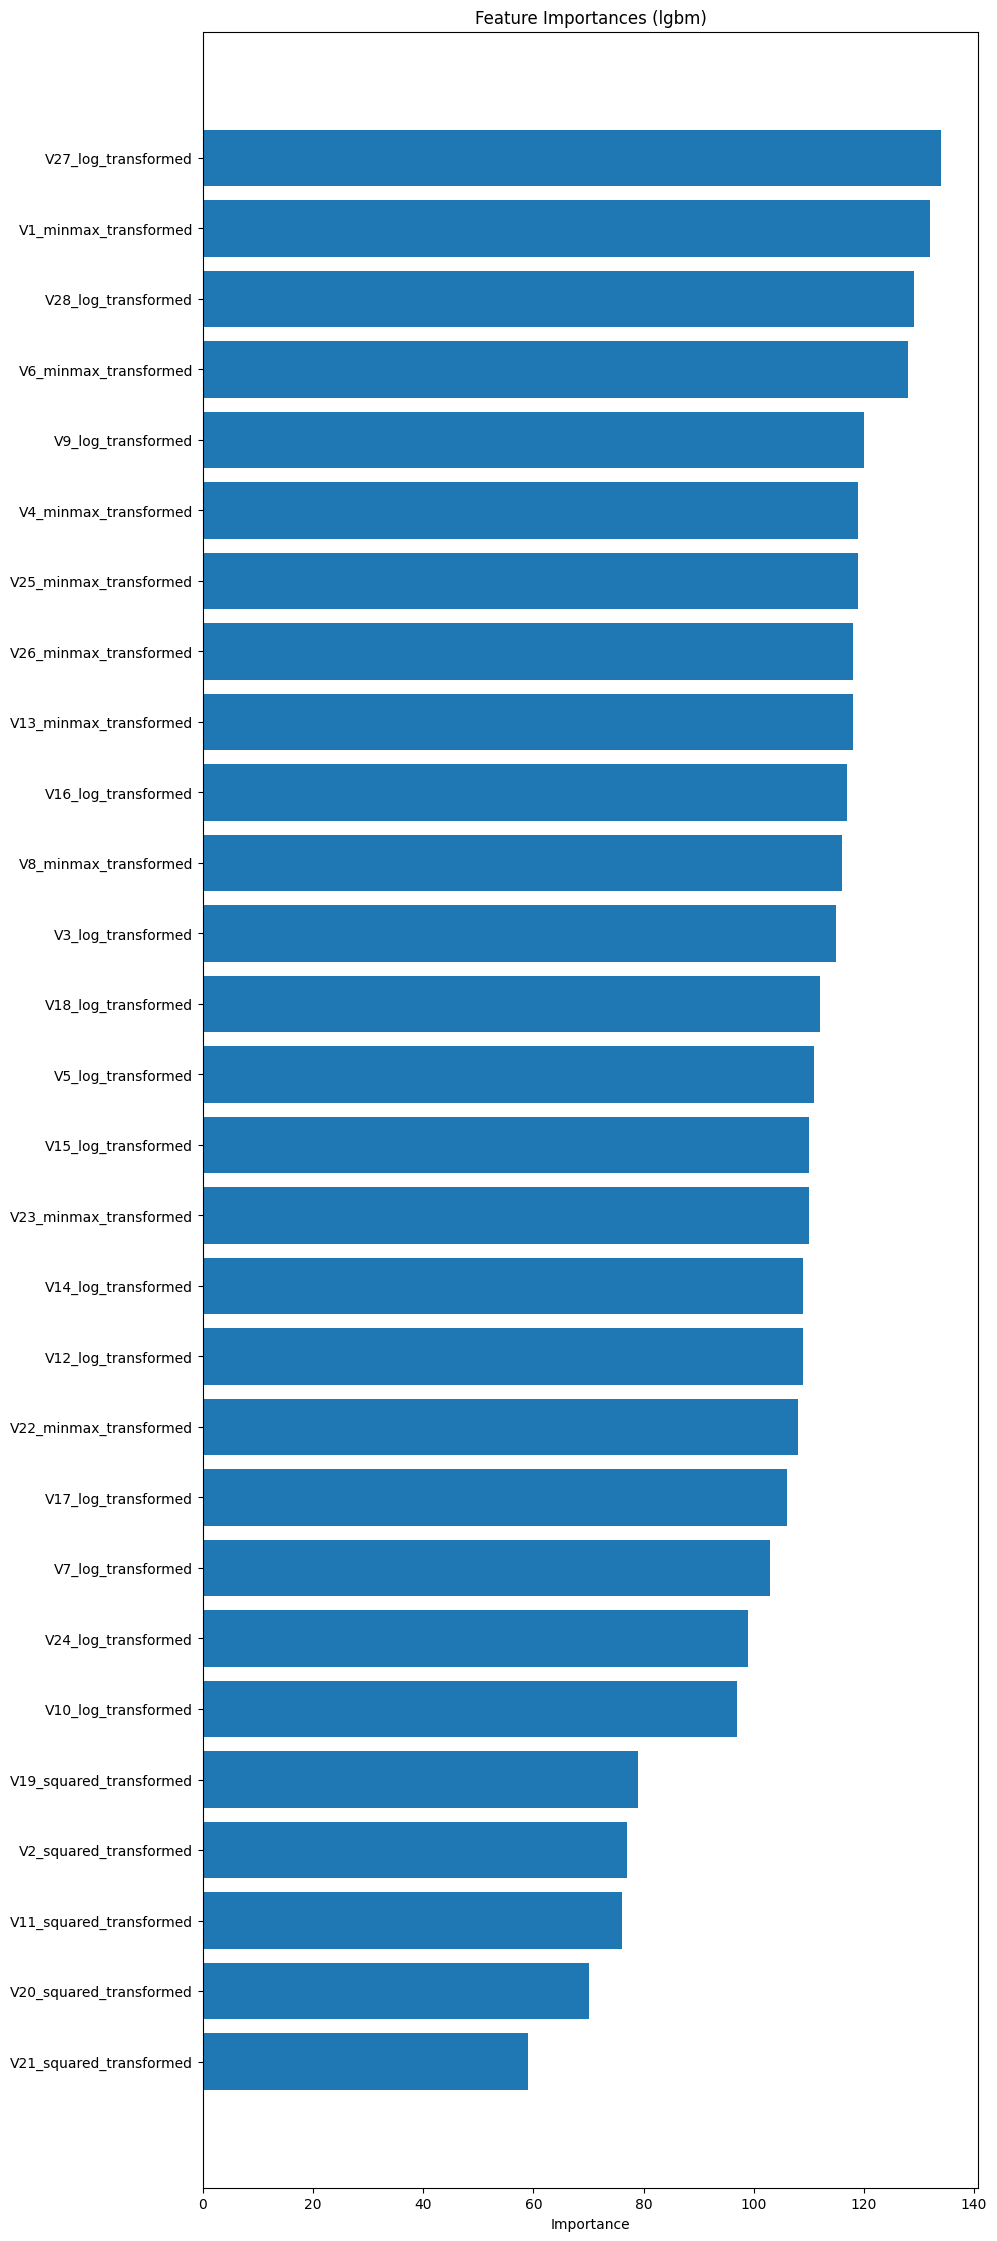

In [ ]:
# Model Tune for LGBM
lgbm_model, lgbm_feature_importances = train_and_evaluate(LGBMRegressor(), 'lgbm', train_x, train_y)

In [ ]:
# Model Tune for Randomforest
ada_model, ada_feature_importances = train_and_evaluate(RandomForestRegressor(), 'RandomForest', train_x, train_y)

Model Tune for RandomForest.


# 코드 연습 용

In [ ]:
# 학습 데이터와 검증 데이터 결합
x_cm = np.vstack((x_train_cla, x_val_cla))
y_cm = np.hstack((y_train, y_val))
sm_cm = sm.add_constant(x_cm)

# 결합된 데이터로 모델 다시 학습
logit_model_cm = sm.Logit(y_cm, sm_cm)
logit_cm = logit_model_cm.fit()

# 테스트 데이터 세트에 상수항 추가 및 최종 평가
x_test_sm = sm.add_constant(x_test_cla)
y_test_pred = logit_cm.predict(x_test_sm)
y_test_pred_class = (y_test_pred > 0.5).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_class)
classification_report_test = classification_report(y_test, y_test_pred_class)

print(conf_matrix_test)
print('-------' * 8)
print(classification_report_test)
# 모델정보 요약
print(logit_cm.summary())

## 로지스틱

In [ ]:
# 로지스틱 하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
X = data_cleaned_YD.drop(columns=['target'])  # Features
y = data_cleaned_YD['target']                  # Target variable

# Split the data into a train+validation set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_test
predicted = model.predict(X_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

## Adasyn

In [ ]:
# Adasyn

from imblearn.over_sampling import ADASYN

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 250000}, random_state=42)

# 특징과 클래스 분리
X = data.drop('target', axis=1)
y = data['target']

# ADASYN을 사용하여 오버샘플링

X_resampled, y_resampled = adasyn.fit_resample(X, y)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='target')], axis=1)

Fraud = balanced_data[balanced_data['target']==1]
Fraud.shape
Fraud.head()

In [ ]:
merged_data = pd.concat([Fraud, Normal], ignore_index=True)

merged_data_YD=merged_data.copy()
merged_data_JG=merged_data.copy()
merged_data_time=merged_data.copy()

## 예닮 Method - Adasyn

In [ ]:
#예닮's method
from sklearn.preprocessing import MinMaxScaler
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (merged_data_YD[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if merged_data_YD[col].min() <= 0:
            merged_data_YD[col] += abs(merged_data_YD[col].min()) + 0.1

for col in pro_skew:
    merged_data_YD[col + '_log_transformed'] = np.log(merged_data_YD[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
  merged_data_YD[col + '_squared_transformed'] = merged_data_YD[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    merged_data_YD[col + '_minmax_transformed'] = scaler.fit_transform(merged_data_YD[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행


# 적용 다한 column은 drop
merged_data_YD.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

merged_data_YD.head()

## 예닮 Adasyn을 이용한 Classification

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML
import scipy.stats as stats
import pylab

target = 'target'

x_data_cla = merged_data_YD.drop(target, axis=1)
y_data = merged_data_YD[target]

x_train_cla, x_test_cla, y_train, y_test = train_test_split(x_data_cla, y_data, test_size=0.2, random_state=42)
x_train_cla, x_val_cla, y_train, y_val = train_test_split(x_train_cla, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(x_train_cla, y_train)

# 예측값 계산
y_train_pred = model.predict(x_train_cla)
y_val_pred = model.predict(x_val_cla)
y_test_pred = model.predict(x_test_cla)

# statsmodels를 사용한 통계적 분석
x_train_const = sm.add_constant(x_train_cla)
model_stats = sm.OLS(y_train, x_train_const).fit()

# 등분산성 확인
model_stats1 = sm.OLS(np.log(y_train), x_train_const).fit()

# 추가 통계 지표
additional_metrics = pd.DataFrame({
    "Metric": ["Adjusted R-squared", "F-statistic", "F-statistic p-value", "MSE", "MAE"],
    "Value": [
        model_stats.rsquared_adj,
        model_stats.fvalue,
        model_stats.f_pvalue,
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
})


print(model_stats.summary())

print("\nAdditional Metrics:\n")
print(additional_metrics)


In [ ]:
# 초기 로지스틱 회귀 모델 구축 및 학습
x_train_sm = sm.add_constant(x_train_cla)
logit_model_tr = sm.Logit(y_train, x_train_sm)
logit = logit_model_tr.fit()

# 검증 데이터 세트에 상수항 추가 및 검증
x_val_sm = sm.add_constant(x_val_cla)
y_val_pred = logit.predict(x_val_sm)
y_val_pred_class = (y_val_pred > 0.5).astype(int)
conf_matrix_v = confusion_matrix(y_val, y_val_pred_class)
classification_report_val = classification_report(y_val, y_val_pred_class)

print(conf_matrix_v)
print('-------' * 8)
print(classification_report_val)

In [ ]:
# 학습 데이터와 검증 데이터 결합
x_cm = np.vstack((x_train_cla, x_val_cla))
y_cm = np.hstack((y_train, y_val))
sm_cm = sm.add_constant(x_cm)

# 결합된 데이터로 모델 다시 학습
logit_model_cm = sm.Logit(y_cm, sm_cm)
logit_cm = logit_model_cm.fit()

# 테스트 데이터 세트에 상수항 추가 및 최종 평가
x_test_sm = sm.add_constant(x_test_cla)
y_test_pred = logit_cm.predict(x_test_sm)
y_test_pred_class = (y_test_pred > 0.5).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_class)
classification_report_test = classification_report(y_test, y_test_pred_class)

print(conf_matrix_test)
print('-------' * 8)
print(classification_report_test)
# 모델정보 요약
print(logit_cm.summary())

## 로지스틱

In [ ]:
# 로지스틱 구현하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
X = merged_data_YD.drop(columns=[ 'target'])  # Features
y = merged_data_YD['target']                  # Target variable

# Split the data into a train+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_val
predicted = model.predict(X_val)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

## 진기 형 Method - Smote

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

X_JG = data_cleaned_JG.drop('target',axis=1)
Y_JG = data_cleaned_JG['target']


left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (X_JG[left_skewed_cols].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in left_skewed_cols:
        if X_JG[col].min() <= 0:
            X_JG[col] += abs(X_JG[col].min()) + 0.1


# train_scaler
train_left_skewed = logTransform(X_JG, left_skewed_cols)
train_right_skewed = quantileTransform(X_JG, right_skewed_cols)

train_transformed = pd.concat([X_JG, train_left_skewed.add_suffix('_log_Transform'), train_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
minmaxScaler = MinMaxScaler()

for col in s_columns:
    train_transformed[col + '_MM_Transform'] = minmaxScaler.fit_transform(train_transformed[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)
# train_transformed.drop(columns ='Time', inplace = True)


# train_transformed.head()

In [ ]:
# train_transformed.drop(columns ='Time', inplace = True)
train_transformed.head()

In [ ]:
train_transformed.columns

In [ ]:
# 로지스틱

# 질문 (train_transformed로 진행되어야 하는지에 대해)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
# X = train_transformed.drop(columns=[ 'Class'])  # Features
# y = train_transformed['Class']                  # Target variable

# Split the data into a train+validation set and test set
X_train, X_test, y_train, y_test = train_test_split( train_transformed, Y_JG, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_test
predicted = model.predict(X_test)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

## 진기형 Smoote를 사용하여 Classification

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML
import scipy.stats as stats
import pylab

target = 'target'

## 이 부분 이렇게 설정하는게 맞나? train-> class를 제외한 나머지 부분을 전처리 하였음(drop을 굳이 하지 않고 진행) / y_data는 target부분만 진
x_data_cla = train_transformed
y_data = data_cleaned_JG[target]

x_train_cla, x_test_cla, y_train, y_test = train_test_split(x_data_cla, y_data, test_size=0.2, random_state=42)
x_train_cla, x_val_cla, y_train, y_val = train_test_split(x_train_cla, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(x_train_cla, y_train)

# 예측값 계산
y_train_pred = model.predict(x_train_cla)
y_val_pred = model.predict(x_val_cla)
y_test_pred = model.predict(x_test_cla)

# statsmodels를 사용한 통계적 분석
x_train_const = sm.add_constant(x_train_cla)
model_stats = sm.OLS(y_train, x_train_const).fit()

# 등분산성 확인
model_stats1 = sm.OLS(np.log(y_train), x_train_const).fit()

# 추가 통계 지표
additional_metrics = pd.DataFrame({
    "Metric": ["Adjusted R-squared", "F-statistic", "F-statistic p-value", "MSE", "MAE"],
    "Value": [
        model_stats.rsquared_adj,
        model_stats.fvalue,
        model_stats.f_pvalue,
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
})


print(model_stats.summary())

print("\nAdditional Metrics:\n")
print(additional_metrics)



In [ ]:
# 초기 로지스틱 회귀 모델 구축 및 학습
x_train_sm = sm.add_constant(x_train_cla)
logit_model_tr = sm.Logit(y_train, x_train_sm)
logit = logit_model_tr.fit()

# 검증 데이터 세트에 상수항 추가 및 검증
x_val_sm = sm.add_constant(x_val_cla)
y_val_pred = logit.predict(x_val_sm)
y_val_pred_class = (y_val_pred > 0.5).astype(int)
conf_matrix_v = confusion_matrix(y_val, y_val_pred_class)
classification_report_val = classification_report(y_val, y_val_pred_class)

print(conf_matrix_v)
print('-------' * 8)
print(classification_report_val)

In [ ]:
# 학습 데이터와 검증 데이터 결합
x_cm = np.vstack((x_train_cla, x_val_cla))
y_cm = np.hstack((y_train, y_val))
sm_cm = sm.add_constant(x_cm)

# 결합된 데이터로 모델 다시 학습
logit_model_cm = sm.Logit(y_cm, sm_cm)
logit_cm = logit_model_cm.fit()

# 테스트 데이터 세트에 상수항 추가 및 최종 평가
x_test_sm = sm.add_constant(x_test_cla)
y_test_pred = logit_cm.predict(x_test_sm)
y_test_pred_class = (y_test_pred > 0.5).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_class)
classification_report_test = classification_report(y_test, y_test_pred_class)

print(conf_matrix_test)
print('-------' * 8)
print(classification_report_test)
# 모델정보 요약
print(logit_cm.summary())

## 진기 형 Method - Adasyn

In [ ]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
import pandas as pd
import numpy as np

def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

X_JG = merged_data_JG.drop('target',axis=1)
Y_JG = merged_data_JG['target']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (X_JG[left_skewed_cols].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in left_skewed_cols:
        if X_JG[col].min() <= 0:
            X_JG[col] += abs(X_JG[col].min()) + 0.1


# train_scaler
train_left_skewed = logTransform(X_JG, left_skewed_cols)
train_right_skewed = quantileTransform(X_JG, right_skewed_cols)

train_transformed = pd.concat([X_JG, train_left_skewed.add_suffix('_log_Transform'), train_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
minmaxScaler = MinMaxScaler()

for col in s_columns:
    train_transformed[col + '_MM_Transform'] = minmaxScaler.fit_transform(train_transformed[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed.drop(columns ='Time', inplace = True)

## 진기형 ADASYN 을 사용한 Classification

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML
import scipy.stats as stats
import pylab

target = 'target'

x_data_cla = train_transformed
y_data = merged_data_JG[target]

x_train_cla, x_test_cla, y_train, y_test = train_test_split(x_data_cla, y_data, test_size=0.2, random_state=42)
x_train_cla, x_val_cla, y_train, y_val = train_test_split(x_train_cla, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(x_train_cla, y_train)

# 예측값 계산
y_train_pred = model.predict(x_train_cla)
y_val_pred = model.predict(x_val_cla)
y_test_pred = model.predict(x_test_cla)

# statsmodels를 사용한 통계적 분석
x_train_const = sm.add_constant(x_train_cla)
model_stats = sm.OLS(y_train, x_train_const).fit()

# 등분산성 확인
model_stats1 = sm.OLS(np.log(y_train), x_train_const).fit()

# 추가 통계 지표
additional_metrics = pd.DataFrame({
    "Metric": ["Adjusted R-squared", "F-statistic", "F-statistic p-value", "MSE", "MAE"],
    "Value": [
        model_stats.rsquared_adj,
        model_stats.fvalue,
        model_stats.f_pvalue,
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
})


print(model_stats.summary())

print("\nAdditional Metrics:\n")
print(additional_metrics)



In [ ]:
# 초기 로지스틱 회귀 모델 구축 및 학습
x_train_sm = sm.add_constant(x_train_cla)
logit_model_tr = sm.Logit(y_train, x_train_sm)
logit = logit_model_tr.fit()

# 검증 데이터 세트에 상수항 추가 및 검증
x_val_sm = sm.add_constant(x_val_cla)
y_val_pred = logit.predict(x_val_sm)
y_val_pred_class = (y_val_pred > 0.5).astype(int)
conf_matrix_v = confusion_matrix(y_val, y_val_pred_class)
classification_report_val = classification_report(y_val, y_val_pred_class)

print(conf_matrix_v)
print('-------' * 8)
print(classification_report_val)



In [ ]:
# 학습 데이터와 검증 데이터 결합
x_cm = np.vstack((x_train_cla, x_val_cla))
y_cm = np.hstack((y_train, y_val))
sm_cm = sm.add_constant(x_cm)

# 결합된 데이터로 모델 다시 학습
logit_model_cm = sm.Logit(y_cm, sm_cm)
logit_cm = logit_model_cm.fit()

# 테스트 데이터 세트에 상수항 추가 및 최종 평가
x_test_sm = sm.add_constant(x_test_cla)
y_test_pred = logit_cm.predict(x_test_sm)
y_test_pred_class = (y_test_pred > 0.5).astype(int)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_class)
classification_report_test = classification_report(y_test, y_test_pred_class)

print(conf_matrix_test)
print('-------' * 8)
print(classification_report_test)
# 모델정보 요약
print(logit_cm.summary())

In [ ]:
# 로지스틱 하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
# X = train_transformed.drop(columns=[ 'Class'])  # Features
# y = train_transformed['Class']                  # Target variable

# Split the data into a train+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split( train_transformed, Y_JG, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_val
predicted = model.predict(X_val)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

## Time만 Scaling - Smote

In [ ]:
from sklearn.preprocessing import StandardScaler

#Time만 스케일링
X_TS = data_cleaned_time.drop('target',axis=1).values
Y_TS = data_cleaned_time['target'].values
TS = data_cleaned_time['Time'].values

#TS 스케일링
scale=StandardScaler()
TS_scaled = scale.fit_transform(TS.reshape(-1, 1))  # TS를 2D 배열로 변환하여 스케일링


# TS_scaled를 DataFrame으로 변환
TS_df = pd.DataFrame(TS_scaled, columns=['Time_Scaled'])

# X_TS와 TS_df를 concat하여 새로운 DataFrame을 생성
X_TS = pd.concat([pd.DataFrame(X_TS), TS_df], axis=1)

X_TS_train, X_TS_test, Y_TS_train, Y_TS_test = train_test_split(X_TS, Y_TS, test_size = 0.30, random_state = 25)


print(X_TS_train.shape,Y_TS_train.shape)
print(X_TS_test.shape,Y_TS_test.shape)

## Time Smote를 사용해서 Classification 진행

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML
import scipy.stats as stats
import pylab

target = 'target'

x_data_cla = data_cleaned_time.drop(target, axis=1)
y_data = data_cleaned_time[target]

x_train_cla, x_test_cla, y_train, y_test = train_test_split(x_data_cla, y_data, test_size=0.2, random_state=42)
x_train_cla, x_val_cla, y_train, y_val = train_test_split(x_train_cla, y_train, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(x_train_cla, y_train)

# 예측값 계산
y_train_pred = model.predict(x_train_cla)
y_val_pred = model.predict(x_val_cla)
y_test_pred = model.predict(x_test_cla)

# statsmodels를 사용한 통계적 분석
x_train_const = sm.add_constant(x_train_cla)
model_stats = sm.OLS(y_train, x_train_const).fit()

# 등분산성 확인
model_stats1 = sm.OLS(np.log(y_train), x_train_const).fit()

# 추가 통계 지표
additional_metrics = pd.DataFrame({
    "Metric": ["Adjusted R-squared", "F-statistic", "F-statistic p-value", "MSE", "MAE"],
    "Value": [
        model_stats.rsquared_adj,
        model_stats.fvalue,
        model_stats.f_pvalue,
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred)
    ]
})


print(model_stats.summary())

print("\nAdditional Metrics:\n")
print(additional_metrics)

In [ ]:
# 초기 로지스틱 회귀 모델 구축 및 학습
x_train_sm = sm.add_constant(x_train_cla)
logit_model_tr = sm.Logit(y_train, x_train_sm)
logit = logit_model_tr.fit()

# 검증 데이터 세트에 상수항 추가 및 검증
x_val_sm = sm.add_constant(x_val_cla)
y_val_pred = logit.predict(x_val_sm)
y_val_pred_class = (y_val_pred > 0.5).astype(int)
conf_matrix_v = confusion_matrix(y_val, y_val_pred_class)
classification_report_val = classification_report(y_val, y_val_pred_class)

print(conf_matrix_v)
print('-------' * 8)
print(classification_report_val)

In [ ]:
# 로지스틱 하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
X = data_cleaned_time.drop(columns=[ 'target'])  # Features
y = data_cleaned_time['target']                  # Target variable

# Split the data into a train+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_val
predicted = model.predict(X_val)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

## Time만 Scaling - Adasyn

In [ ]:
## 오류 코드 ##

from sklearn.preprocessing import StandardScaler

#Time만 스케일링
X_TS = merged_data_time.drop('target',axis=1).values
Y_TS = merged_data_time['target'].values
# TS=merged_data_TS['Time'].values

#TS 스케일링
scale=StandardScaler()
# TS = scale.fit_transform(TS.reshape(1,-1))

# X_TS=pd.concat([X_TS,TS], ignore_index=True, axis=1)

X_TS_train, X_TS_test, Y_TS_train, Y_TS_test = train_test_split(X_TS, Y_TS, test_size = 0.30, random_state = 25)
X_TS_train['Time'] = scale.fit_transform(X_TS_train.reshape(1,-1))
X_TS_test['Time'] = scale.fit_transform(X_TS_test.reshape(1,-1))

print(X_TS_train.shape,Y_TS_train.shape)
print(X_TS_test.shape,Y_TS_test.shape)

In [ ]:
## 수정 코드 ##

from sklearn.preprocessing import StandardScaler

# Time만 스케일링
X_TS = merged_data_time.drop('target', axis=1)
Y_TS = merged_data_time['target']

# # TS 스케일링
# scale = StandardScaler()

# # Time 열에 대해 스케일링 수행
# X_TS['Time'] = scale.fit_transform(X_TS['Time'].values.reshape(-1, 1))

# train_test_split을 수행
X_TS_train, X_TS_test, Y_TS_train, Y_TS_test = train_test_split(X_TS, Y_TS, test_size=0.30, random_state=25)

print(X_TS_train.shape, Y_TS_train.shape)
print(X_TS_test.shape, Y_TS_test.shape)


In [ ]:
# 로지스틱 하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
SEED = 42

# Split the data into features and target variable
X = merged_data_time.drop(columns=[ 'target'])  # Features
y = merged_data_time['target']                  # Target variable

# Split the data into a train+validation set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Further split the train+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED) # 0.25 x 0.8 = 0.2

model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

expected = y_val
predicted = model.predict(X_val)
f1 = f1_score(expected, predicted)

print(metrics.classification_report(expected, predicted))
print('Accuracy:', accuracy_score(expected, predicted))
print('F1 Score:', f1)

In [ ]:
from sklearn.metrics import confusion_matrix    # 로지스틱 회귀

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 혼동 행렬 얻기
conf_matrix = confusion_matrix(y_test, y_pred)

# False Positive, True Negative 값을 추출
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# False Positive, False Negative
tn, fp, fn, tp = conf_matrix.ravel()
# True Positive , True Negative
tn, fp, fn, tp = conf_matrix.ravel()


# FPR 계산
fpr = fp / (fp + tn)

#Sensitivity
Sensitivity = tp / (tp + tn)

#Specision
Specision = fn / (fp + fn)

# Precision
pre = tp / (tp + fp)

#FNR
tnr = tn / (tp + tn)



print('False Positive Rate:', fpr)
print('Sensitivity',Sensitivity )
print('Specision',Specision )
print('Precision', pre)
print('False Negative Rate : ',tnr )

결과 해석 및 이해하기

False Positive Rate (FPR): FPR은 실제 Negative인 샘플 중에서 모델이 Positive로 잘못 예측한 비율을 나타냅니다. 즉, 거짓 양성의 비율입니다. 여기서는 0.0329로, 3.29%의 Negative 샘플이 모델에 의해 잘못된 Positive로 분류되었다는 것을 의미합니다.

Sensitivity (또는 Recall 또는 True Positive Rate): Sensitivity는 실제 Positive 중에서 모델이 Positive로 올바르게 예측한 비율을 나타냅니다. 여기서는 0.4625로, 46.25%의 실제 Positive가 모델에 의해 올바르게 Positive로 분류되었다는 것을 의미합니다.

Specificity: 여기에서는 "Specision"으로 오타가 있어서 정확한 해석이 어렵습니다. 일반적으로 Specificity는 실제 Negative 중에서 모델이 Negative로 올바르게 예측한 비율을 나타냅니다. 높은 Specificity는 모델이 실제 Negative를 잘 구분한다는 것을 의미합니다.

Precision: Precision은 모델이 Positive로 예측한 샘플 중에서 실제 Positive인 비율을 나타냅니다. 여기서는 0.96196로, 모델이 Positive로 예측한 것 중 96.2%가 실제로 Positive였다는 것을 의미합니다.

False Negative Rate (FNR): FNR은 실제 Positive인 샘플 중에서 모델이 Negative로 잘못 예측한 비율을 나타냅니다. 즉, 거짓 음성의 비율입니다. 여기서는 0.5375로, 53.75%의 실제 Positive가 모델에 의해 잘못된 Negative로 분류되었다는 것을 의미합니다.

## 예닮 SMOTE로 Classification 진행하기

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from IPython.display import display, HTML
import scipy.stats as stats
import pylab